<a href="https://colab.research.google.com/github/tpujianto/LendingClub_Loan_Prediction/blob/master/loan_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction
## Based on Lending Club Data

A capstone project for Springboard Data Science Career Track Program.

### Import Data

In [2]:
# Google Colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Essentials
import numpy as np
import pandas as pd

In [3]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1-ZPcOoFPnfNPYSi9Px774pRbP7vRTP3R/view?usp=sharing'

In [5]:
downloaded = drive.CreateFile({'id':'1-ZPcOoFPnfNPYSi9Px774pRbP7vRTP3R'}) 
downloaded.GetContentFile('data_clean.csv')  
df = pd.read_csv('data_clean.csv')

# Dataset is now stored in a Pandas Dataframe
print('The shape of dataframe: ', df.shape)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

The shape of dataframe:  (2260701, 44)


## Modeling

In [6]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 3.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 13.9MB 10.2MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 266kB 56.0MB/s 
     |████████████████████████████████| 276kB 54.7MB/s 
     |████████████████████████████████| 1.8MB 48.0MB/s 
     |████████████████████████████████| 6.8MB 57.0MB/s 
     |████████████████████████████████| 66.2MB 63kB/s 
     |████████████████████████████████| 1.6MB 59.0MB/s 
     |████████████████████████████████| 245kB 56.0MB/s 
     |████████████████████████████████| 1.1MB 50.8MB/s 
     |████████████████████████████████| 6.0MB 45.9MB/s 
     |████████████████████████████████| 163kB 53.5MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 153kB 54.4MB/s 
     |████████████████████████████████| 327kB 58.9MB/s

In [7]:
from pycaret.classification import * 
clf = setup(df, target='target', sampling=False)

Setup Succesfully Completed!


,Description,Value
0,session_id,5876
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2260701, 44)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
     

In [8]:
whitelist = ['catboost', 'lightgbm', 'gbc', 'rf', 'knn']

In [9]:
compare_models(fold=5, sort='AUC', whitelist=whitelist)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7568,0.8360,0.7805,0.7612,0.7707,0.5120,0.5121,63.8516
1,Light Gradient Boosting Machine,0.7328,0.8031,0.7754,0.7308,0.7524,0.4627,0.4637,3.6287
2,Gradient Boosting Classifier,0.6678,0.7274,0.7102,0.6734,0.6913,0.3324,0.3329,1032.0488
3,Random Forest Classifier,0.6219,0.6707,0.5766,0.6589,0.6150,0.2469,0.2490,11.3751
4,K Neighbors Classifier,0.5327,0.5439,0.5638,0.5528,0.5583,0.0623,0.0623,744.4443


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7fcf1ff0cf28>
INFO:logs:compare_models() succesfully completed......................................


In [10]:
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7585,0.8379,0.7802,0.7637,0.7719,0.5154,0.5155
1,0.7557,0.8349,0.7789,0.7605,0.7696,0.5098,0.5100
2,0.7582,0.8375,0.7806,0.7631,0.7718,0.5148,0.5149
3,0.7570,0.8362,0.7804,0.7614,0.7708,0.5122,0.5124
4,0.7575,0.8373,0.7803,0.7623,0.7712,0.5133,0.5135
5,0.7565,0.8357,0.7804,0.7609,0.7705,0.5114,0.5115
6,0.7577,0.8362,0.7812,0.7621,0.7716,0.5137,0.5139
7,0.7579,0.8373,0.7807,0.7626,0.7716,0.5141,0.5142
8,0.7572,0.8367,0.7817,0.7612,0.7713,0.5128,0.5130
9,0.7563,0.8357,0.7781,0.7617,0.7698,0.5110,0.5112


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7fcf205b3cc0>
INFO:logs:create_model() succesfully completed......................................


In [21]:
!pip install shap

     |████████████████████████████████| 327kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456466 sha256=9fe55b03f31cc3df9fd8039958a4b2ade1a9d259553957f7233473a1280047c3
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x7fcf205b3cc0>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


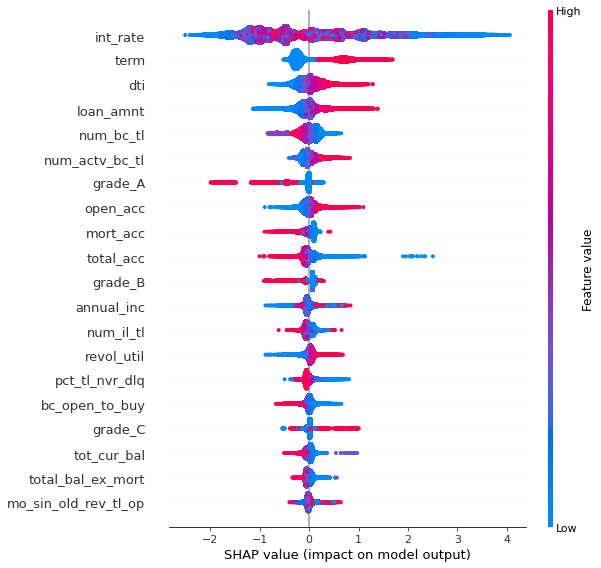

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [22]:
interpret_model(model)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x7fcf205b3cc0>, plot=correlation, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


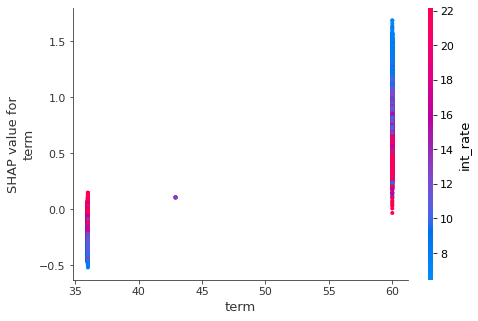

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [23]:
interpret_model(model, plot='correlation')

In [25]:
# make predictions
predictions = predict_model(model)
# view the predictions
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7576,0.8367,0.7805,0.7624,0.7713,0.5136,0.5138


,term,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,acc_open_past_24mths,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,...,verification_status_Source Verified,verification_status_Verified,verification_status_not_available,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_not_available,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_not_available,emp_length_0,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,target,Label,Score
0,36.0,7200.0,12.62,44000.0,14.43,0.0,0.0,9.0,0.0,5478.0,31.7,11.0,0.0,0.0,60.0,25971.0,6.0,7973.0,0.0,0.0,3.0,116.0,3.0,3.0,0.0,4.0,3.0,0.0,3.0,6.0,1.0,0.0,0.0,4.0,100.0,0.0,25971.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.7258
1,36.0,20000.0,8.39,179000.0,15.07,1.0,2.0,29.0,0.0,38439.0,58.2,46.0,0.0,0.0,116.0,441946.0,11.0,10161.0,0.0,0.0,167.0,185.0,1.0,1.0,2.0,4.0,1.0,0.0,9.0,10.0,11.0,0.0,0.0,5.0,93.5,0.0,79450.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.4531
2,36.0,3000.0,16.29,65500.0,22.70,0.0,0.0,16.0,0.0,45886.0,73.9,33.0,0.0,0.0,0.0,204590.0,2.0,10022.0,0.0,0.0,133.0,496.0,10.0,10.0,5.0,10.0,9.0,0.0,5.0,10.0,5.0,0.0,0.0,2.0,97.0,0.0,60766.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2462
3,36.0,4500.0,10.42,90000.0,25.17,13.0,0.0,10.0,0.0,2776.0,11.0,24.0,0.0,0.0,0.0,161210.0,2.0,8100.0,0.0,0.0,190.0,118.0,28.0,15.0,0.0,28.0,18.0,5.0,3.0,4.0,19.0,0.0,13.0,0.0,29.0,0.0,161210.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8201
4,36.0,20000.0,7.35,200000.0,2.69,0.0,0.0,3.0,0.0,20653.0,93.9,12.0,0.0,0.0,0.0,20653.0,1.0,1347.0,0.0,0.0,160.0,393.0,17.0,17.0,0.0,17.0,5.0,0.0,2.0,4.0,8.0,0.0,0.0,0.0,100.0,0.0,20653.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678206,36.0,3250.0,18.75,96500.0,9.19,0.0,2.0,20.0,0.0,16648.0,71.5,40.0,0.0,0.0,0.0,396128.0,6.0,435.0,0.0,0.0,107.0,198.0,22.0,4.0,4.0,52.0,3.0,0.0,7.0,8.0,19.0,0.0,0.0,3.0,100.0,0.0,105805.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1195
678207,60.0,40000.0,18.99,145000.0,19.63,0.0,3.0,24.0,0.0,16155.0,13.5,49.0,0.0,0.0,0.0,217220.0,6.0,78745.0,0.0,0.0,203.0,174.0,6.0,3.0,0.0,6.0,3.0,0.0,3.0,24.0,17.0,0.0,0.0,5.0,100.0,0.0,217220.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.

In [26]:
finalize_model(model)

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7fcce67904a8>
INFO:logs:finalize_model() succesfully completed......................................


In [27]:
save_model(model, 'loan_prediction_catboost')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostClassifier object at 0x7fcf205b3cc0>, model_name=loan_prediction_catboost, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:loan_prediction_catboost.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                ('group', Empt

Transformation Pipeline and Model Succesfully Saved
